<a href="https://colab.research.google.com/github/fccdelcampo/VersionControl/blob/main/CC19_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install ucimlrepo

In [27]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew, normaltest
from sklearn import preprocessing
import numpy as np
import math
import matplotlib.pyplot as plt

In [28]:
# fetch df
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
income_list = []
categorical_data = ['education','income', 'marital-status','native-country','occupation','race','relationship','sex','workclass']
numerical_data = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

for income in adult.data.targets['income'].tolist():
    if income == "<=50K.":
        income_list.append("<=50K")
    elif income == ">50K.":
        income_list.append(">50K")
    else:
        income_list.append(income)

df = adult.data.features.assign(income = income_list)

In [29]:

print("===========ROWS WITH MISSING VALUES PER COLUMN===========")
print(df.isnull().sum())
cols_with_missing_vals = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        cols_with_missing_vals.append(col)

print(f"occurences of ? in workclass: {df['workclass'].value_counts().get('?', 0)}")
print(f"occurences of ? in occupation: {df['occupation'].value_counts().get('?', 0)}")
print(f"occurences of ? in native country: {df['native-country'].value_counts().get('?', 0)}")


print(f"===========NUMBER OF DUPLICATES: {df.duplicated().sum()}===========")
df = df.drop_duplicates().reset_index(drop=True) # Removes duplicates

print("===========PREPROCESSING DESCRIPTIVE STATISTICS===========")
print(df.describe()) # median and mode is not included
print("===========MEDIAN===========")
print(df.median(numeric_only=True)) # prints the median of each column with numerical values
print("===========MODE===========")
print(df.mode(numeric_only=True))

print("===========ROWS WITH REMOVED MISSING VALUES===========")

df = df.dropna()
for col in cols_with_missing_vals:
    df.drop(df.index[(df[col].isna())], axis=0, inplace=True)

df = df[~df[categorical_data].isin(['?']).any(axis=1)].reset_index(drop=True) # Removes rows with a ? in any of its categorical columns

print(df)

===========ROWS WITH MISSING VALUES PER COLUMN===========
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
occurences of ? in workclass: 1836
occurences of ? in occupation: 1843
occurences of ? in native country: 583
===========NUMBER OF DUPLICATES: 48===========
===========PREPROCESSING DESCRIPTIVE STATISTICS===========
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48794.000000  4.879400e+04   48794.000000  48794.000000  48794.000000   
mean      38.651474  1.896688e+05      10.078862   1080.129135     87.588392   
std       13.708757  1.056171e+05       2.569975   7455.606716    403.193381   
min       17.000000  1.228500e+04       1.000000      0.000000 

<ipython-input-29-d095923d463f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[(df[col].isna())], axis=0, inplace=True)


In [30]:
print("===========HANDLING OUTLIERS===========")
# three-sigma rule
for col in numerical_data:
    if col != "age":
        ul = df[col].mean() + 3*df[col].std()
        ll = df[col].mean() - 3*df[col].std()
        df.loc[df[col] > ul, col] = ul
        df.loc[df[col] < ll, col] = ll

# IQR Method (INCOMPATIBLE WITH DATA)
# for col in numerical_data:
#     if (col != "age") and (col != "capital-gain") and (col != "capital-loss"):
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         iqr = q3-q1
#         ul = np.int64(q3 + (1.5 * iqr))
#         ll = np.int64(q1 - (1.5 * iqr))
#         df.loc[df[col] > ul, col] = ul
#         df.loc[df[col] < ll, col] = ll


print("===========HANDLED OUTLIERS===========")
print(df.describe())
print("===========MEDIAN===========")
print(df.median(numeric_only=True))
print("===========MODE===========")
print(df.mode(numeric_only=True))

===========HANDLING OUTLIERS===========
===========HANDLED OUTLIERS===========
                age         fnlwgt  education-num  capital-gain  capital-loss  \
count  45175.000000   45175.000000   45175.000000  45175.000000  45175.000000   
mean      38.556170  188429.110456      10.123843    707.536581     61.027736   
std       13.215349   99679.796720       2.537252   2971.603138    274.655435   
min       17.000000   13492.000000       2.464094      0.000000      0.000000   
25%       28.000000  117392.500000       9.000000      0.000000      0.000000   
50%       37.000000  178312.000000      10.000000      0.000000      0.000000   
75%       47.000000  237903.000000      13.000000      0.000000      0.000000   
max       90.000000  506696.107994      16.000000  23633.325899   1304.157427   

       hours-per-week  
count    45175.000000  
mean        40.832054  
std         11.556779  
min          4.919322  
25%         40.000000  
50%         40.000000  
75%         45.000000  

<ipython-input-30-94ac767716bd>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '506696.10799399414' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > ul, col] = ul
<ipython-input-30-94ac767716bd>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.774533166618454' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > ul, col] = ul
<ipython-input-30-94ac767716bd>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23633.32589891116' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > ul, col] = ul
<ipython-input-30-94ac767716bd>:7: FutureWarning: Setting an item of incompatible dtype i

In [31]:
print("===========CATEGORICAL DATA TO NUMERICAL DATA===========")

categorical_columns = df[categorical_data].columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df, one_hot_df], axis=1).drop(categorical_columns, axis=1)

===========CATEGORICAL DATA TO NUMERICAL DATA===========


In [32]:
"""
Standardization/normalization of numerical data:
If the data in a certain column is normally distributed, it will be normalized.
Else, it will be standardized (min-max scaling).
"""

print("===========STANDARDIZATION AND NORMALIZATION===========")
for col in numerical_data:
  _, p = normaltest(df[col].tolist())
  if p > 0.05:
    df[col] = (df[col] - df.mean()) / df[col].std()
    print(f'{col} is normally distributed.')
  else:
    if skew(df[col].tolist(), axis=0, bias=True) < 0:
      print(f"{col} is skewed to the left")
    else:
      print(f"{col} is skewed to the right")
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.describe().to_excel("transform.xlsx")
df.median(numeric_only=True).to_excel("transform_median.xlsx")
df.mode(numeric_only=True).to_excel("mode.xlsx")

print("===========FINAL OUTPUT===========")
print(df.describe())
print("===========MEDIAN===========")
print(df.median(numeric_only=True))
print("===========MODE===========")
print(df.mode(numeric_only=True))

# Outputs the cleaned to an excel file.
df.to_excel("df.xlsx")

===========STANDARDIZATION AND NORMALIZATION===========
age is skewed to the right
fnlwgt is skewed to the right
education-num is skewed to the left
capital-gain is skewed to the right
capital-loss is skewed to the right
hours-per-week is skewed to the left
===========FINAL OUTPUT===========
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  45175.000000  45175.000000   45175.000000  45175.000000  45175.000000   
mean       0.295290      0.354695       0.565884      0.029938      0.046795   
std        0.181032      0.202107       0.187446      0.125738      0.210600   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.210664       0.482857      0.000000      0.000000   
50%        0.273973      0.334182       0.556734      0.000000      0.000000   
75%        0.410959      0.455006       0.778367      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000     

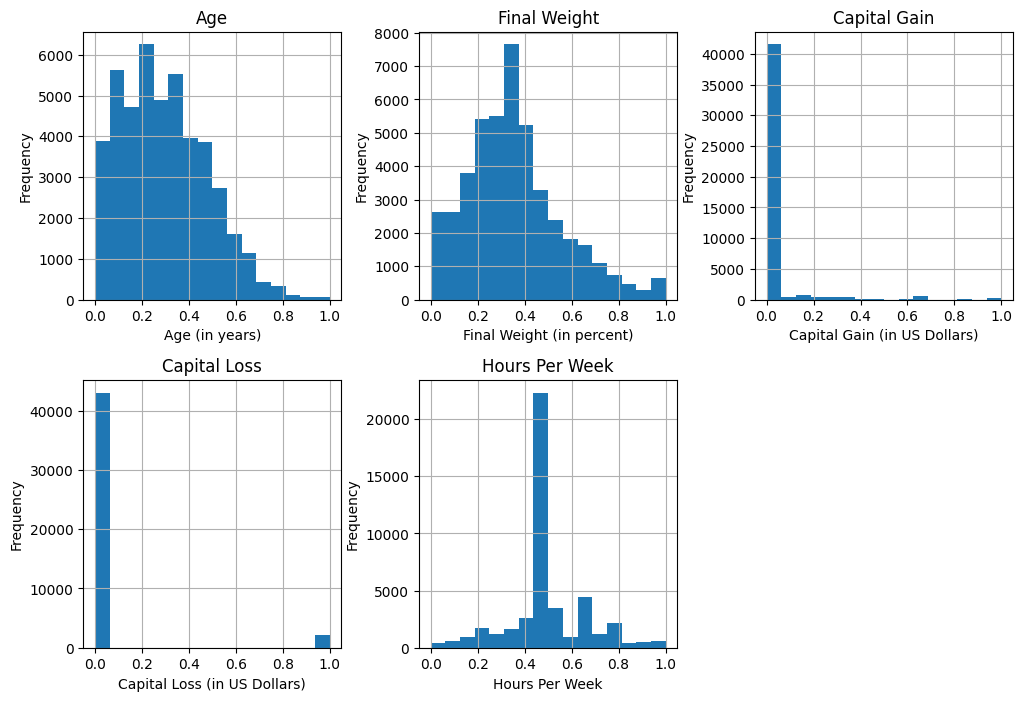

In [25]:

"""
Visualization of data:
Histograms for numerical data
"""

feature_title_map = {
    "workclass": " Work Class",
    "age": "Age",
    "fnlwgt": "Final Weight",
    "education": "Education",
    "education-num": "Education Number",
    "marital-status": "Marital Status",
    "occupation": "Occupation",
    "relationship": "Relationship",
    "race": "Race",
    "sex": "Sex",
    "capital-gain": "Capital Gain",
    "capital-loss": "Capital Loss",
    "hours-per-week": "Hours Per Week",
    "native-country": "Native Country",
    "income": "Income"
}

feature_unit_map = {
    "age": "Age (in years)",
    "fnlwgt": "Final Weight (in percent)",
    "capital-gain": "Capital Gain (in US Dollars)",
    "capital-loss": "Capital Loss (in US Dollars)",
    "hours-per-week": "Hours Per Week"
}

numerical_cols = [col for col in numerical_data if col != "education-num"]
histogram = df.hist(
    column=numerical_cols,
    figsize=(12,8),
    layout=(2, math.ceil(len(numerical_data) / 2)),
    bins=(math.floor(1+3.322*math.log10(df.shape[0])))
)

for axis in histogram.flatten():
  column_name = axis.get_title()
  if column_name in feature_unit_map:
    axis.set_title(feature_title_map[column_name])
    axis.set_xlabel(feature_unit_map[column_name])
    axis.set_ylabel("Frequency")

north_america = ["United-States", "Puerto-Rico", "Canada", "Outlying-US(Guam-USVI-etc)", "Cuba", "Honduras", "Mexico", "Dominican-Republic", "Haiti", "Guatemala", "Nicaragua", "El-Salvador", "Trinadad&Tobago"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "Germany", "Greece", "Italy", "Poland", "Portugal", "Ireland", "France", "Hungary", "Scotland", "Holand-Netherlands", "Yugoslavia"]
asia = ["Cambodia", "India", "Japan", "China", "Iran", "Philippines", "Vietnam", "Laos", "Taiwan", "Thailand", "Hong"]

"""
Visualization of data:
Pie charts for categorical data
"""

df_tempcopy = df.copy()

continent_mapping = {}
for country in north_america:
    continent_mapping[country] = 'North America'
for country in south_america:
    continent_mapping[country] = 'South America'
for country in europe:
    continent_mapping[country] = 'Europe'
for country in asia:
    continent_mapping[country] = 'Asia'

# df_tempcopy["native-country"] = df_tempcopy["native-country"].map(continent_mapping)

# Create the bar chart using pandas plotting
for col in categorical_data:
  if col in ["native-country",'education','income', 'marital-status', 'occupation', 'race', 'relationship', 'sex', 'workclass']:
    continue

  df[col].value_counts().plot(kind='bar', title=f'Bar Chart for {feature_title_map[col]}')
  plt.xlabel(feature_title_map[col])
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')
  plt.show()
